<a href="https://colab.research.google.com/github/Raquelreyes/BBDD/blob/main/Clasedel31_Oct_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
Datos = pd.read_csv('U4_01_housing.csv')

In [43]:
Datos.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
Datos.value_counts('ocean_proximity')
#1 ,2 3, 4, 5 no es una manera viable de hacerlo, podria considerarlo como un patron.
#Asignarle un ID

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
dtype: int64

In [45]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
#Muestra informnacion interesante con relacion a los datos (medias, %, etc)
Datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

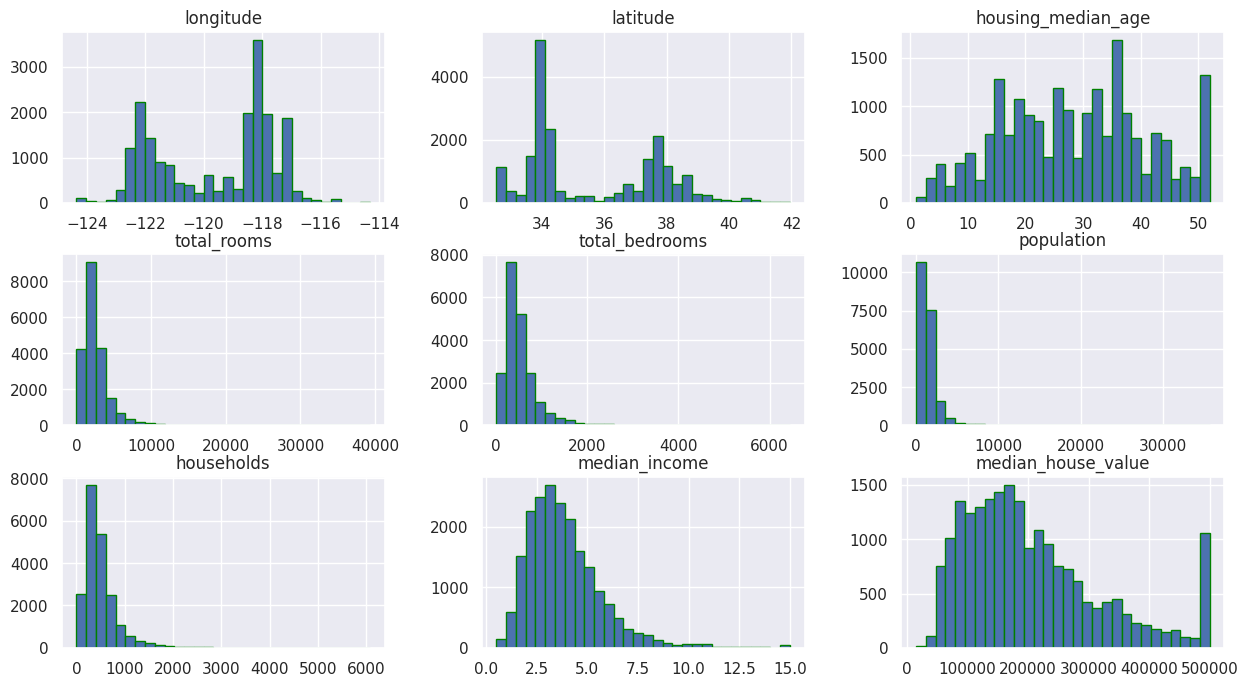

In [47]:
# Me representa la informacion en histogramas.
# figsize: Dimensiones de las columnas.
# bins: Cambiar el numero de columnas en el histograma.
# edgecolor: COlor de la linea limite de las columnas.
Datos.hist(figsize=(15,8), bins=30, edgecolor='green')

In [48]:
Datos_na=Datos.dropna() #Eliminar los registros nulos.

In [49]:
Datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<Axes: xlabel='latitude', ylabel='longitude'>

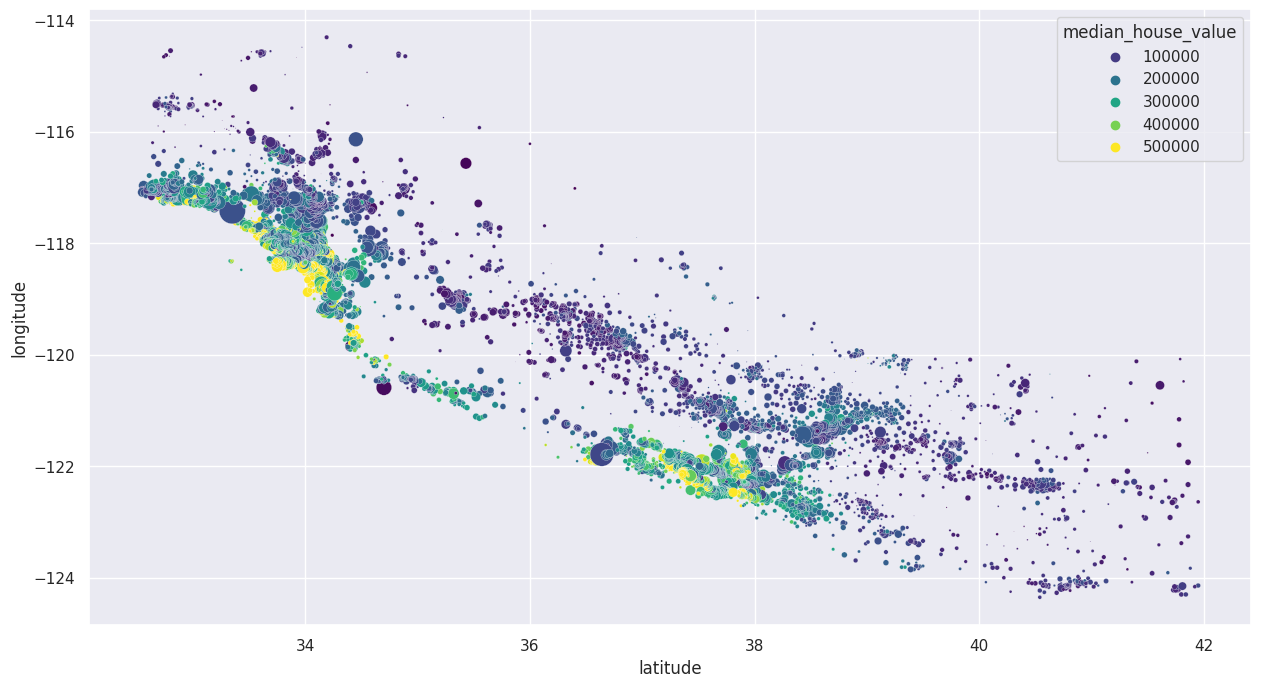

In [50]:
#Graficar los datos
import seaborn as sb

sb.scatterplot(x='latitude', y='longitude', data=Datos_na, hue='median_house_value',s=Datos_na['population']/100, palette='viridis')

<Axes: xlabel='latitude', ylabel='longitude'>

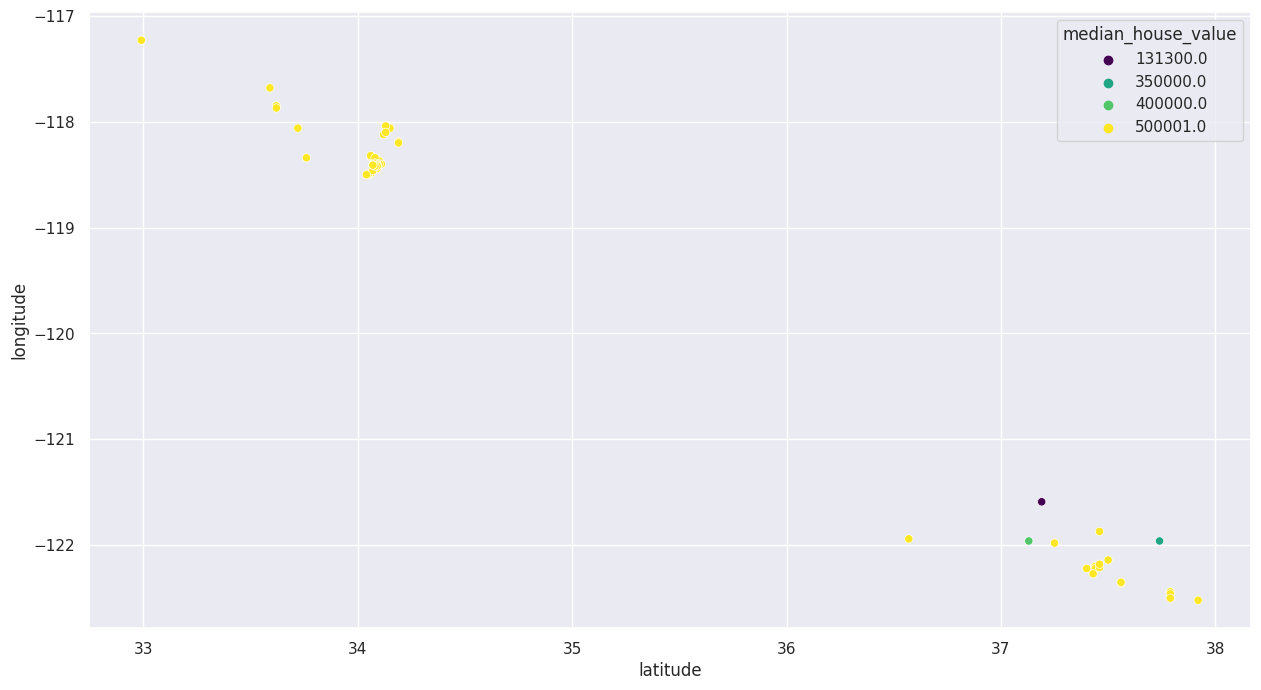

In [51]:
sb.scatterplot(x='latitude', y='longitude', data=Datos_na[Datos_na.median_income>14], hue='median_house_value', palette='viridis')

In [97]:
#Datos_na['ocean_proximity']
Datos_na=Datos.dropna()
Dummies=pd.get_dummies(Datos_na['ocean_proximity'], type)



Datos_na.join(Dummies)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<class 'type'>_<1H OCEAN,<class 'type'>_INLAND,<class 'type'>_ISLAND,<class 'type'>_NEAR BAY,<class 'type'>_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [98]:
Datos_na.join(Dummies)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<class 'type'>_<1H OCEAN,<class 'type'>_INLAND,<class 'type'>_ISLAND,<class 'type'>_NEAR BAY,<class 'type'>_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


<ipython-input-99-968bce75ec21>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data=Datos_na.corr(),annot=True, cmap='YlGnBu')


<Axes: >

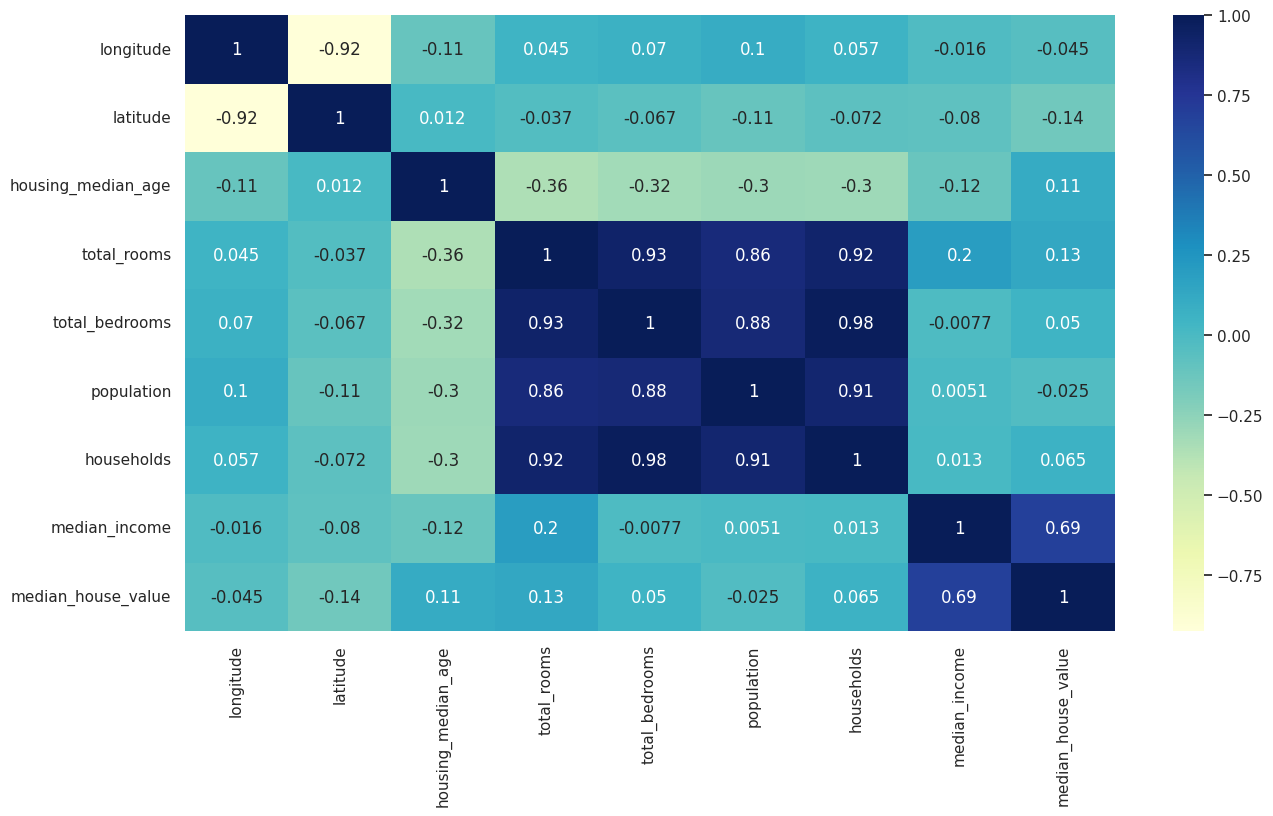

In [99]:
from matplotlib import rc
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=Datos_na.corr(),annot=True, cmap='YlGnBu')


In [100]:
#valores correlacionados del
Datos.corr()['median_house_value'].sort_values(ascending=False)

<ipython-input-100-5bd9dd0dbe8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Datos.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

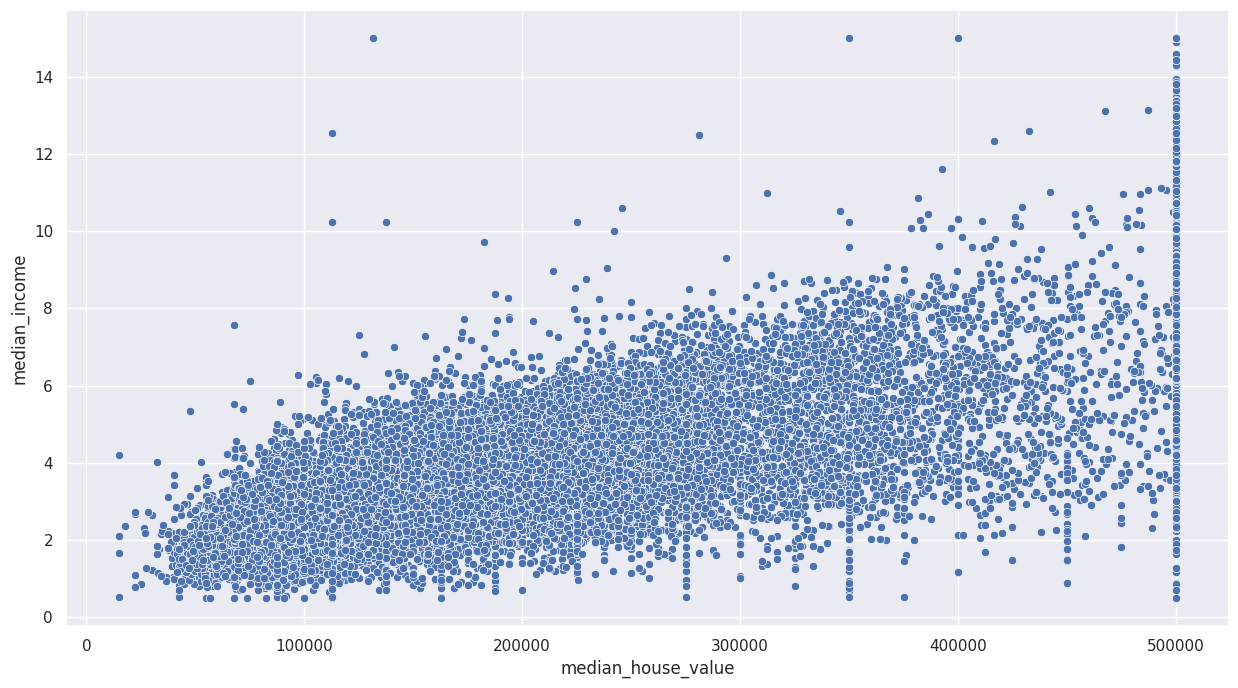

In [101]:
#grafica de relacion entre el valor de la casa y los ingreso
sb.scatterplot(x= Datos_na['median_house_value'],y=Datos_na['median_income'])

In [103]:
#agregar caracteristica de ratio de habitaciones de dormir
Datos_na['room_ratio']= Datos_na['total_bedrooms']/Datos_na['total_rooms']

<ipython-input-103-660f3e4d01d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datos_na['room_ratio']= Datos_na['total_bedrooms']/Datos_na['total_rooms']


In [104]:
#separar las caracteristicas

#caracteristicas de entrada

X=Datos_na.drop(['median_house_value'],axis=1) #eliminar una columna
#etiquetas de salida

y=Datos_na['median_house_value']

In [113]:
# separar el conjunto de caracteristicas en datos de prueba/ datos de entrenamiento

from sklearn.model_selection import train_test_split

X_train,y_train,X_test,y_test=train_test_split(X, y , test_size=0.2)

In [114]:
#entrenar el modelo
from sklearn.linear_model import LinearRegression

modelo= LinearRegression()

modelo.fit(X_train,y_train) #ocurre el entrenamiento


ValueError: ignored

In [109]:
predicciones = modelo.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [110]:

comparativa={'predicciones': predicciones, 'Valor original': y_test}
pd.DataFrame(comparativa)

NameError: ignored

In [ ]:
print(modelo.score(X_train, y_train))
print(modelo.score(X_test, y_test))

In [116]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mse =mean_absolute_error(y_test, predicciones)
#mse
mse = np.sqrt(mse)

mse


NameError: ignored

In [115]:
#escalamiento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_esc=scaler.fit_transform(X_train)
X_test_esc=scaler.fit_transform(X_test)

pd.DataFrame(X_train_esc)

ValueError: ignored